In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier

In [2]:
data=pd.read_csv('../Phase_1_data/baseball.csv')

In [3]:
print('Data Shape:',data.shape)

Data Shape: (30, 17)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [5]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


C:\Users\kulsr\AppData\Local\Temp\ipykernel_30948\3087355156.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=data, x='W',fill=True,  palette='Set2')


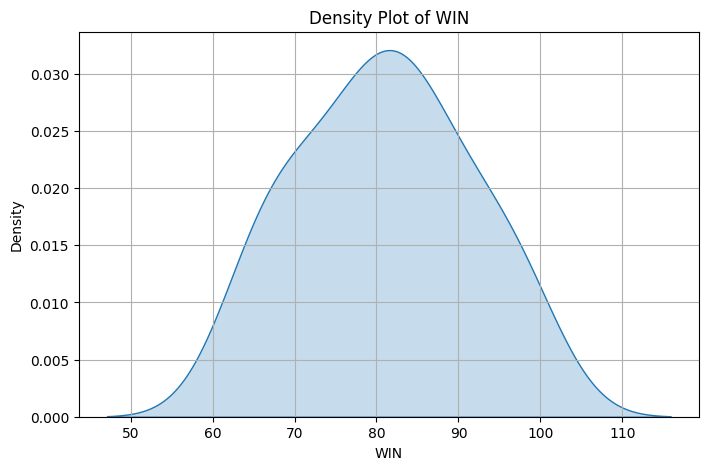

In [6]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data, x='W',fill=True,  palette='Set2')
plt.title('Density Plot of WIN')
plt.xlabel('WIN')
plt.ylabel('Density')
plt.grid(True)
plt.show()

## Feature Selection

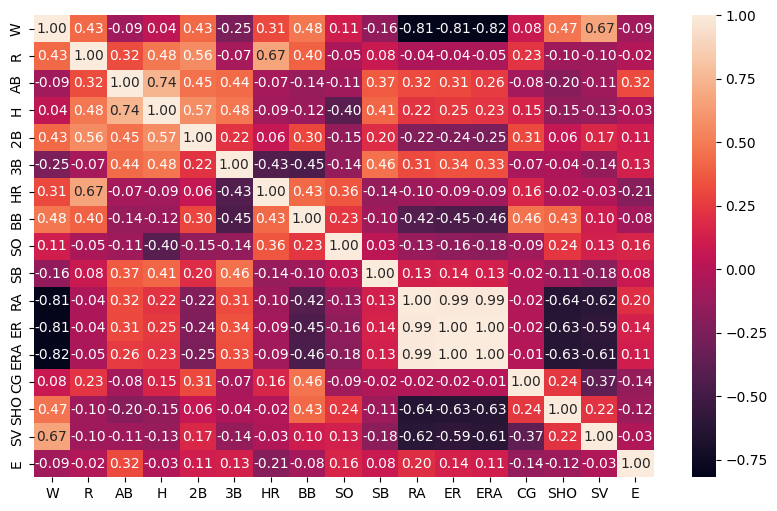

In [8]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(data=data.corr(), annot=True, fmt='.2f')

In [9]:
data=data.drop(columns=['AB', 'H', 'E', 'CG'],axis=1).copy()

In [10]:
data.isna().sum()

W      0
R      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
SHO    0
SV     0
dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
X = data.drop('W', axis = 1)
y = data['W']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=17)

## Taining a Model

In [14]:
def plot_results(test, pred, model_name):
    fig, ax = plt.subplots(figsize=(15, 4))
    x_axis = np.arange(0, test.shape[0], 1)
    sns.lineplot(y=test, x=x_axis, label='Actual', color='mediumblue')
    sns.lineplot(y=pred, x=x_axis, label='Predicted', color='red')
    ax.set(xlabel="Values", ylabel="Target", title=f"{model_name}_Actual_vs_Prediction")
    ax.legend()
    sns.despine()
    plt.show()

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluation_fn(best_model, X_test_scaled, Y_test, model_name, save_plot=False):
    # Evaluate the model on the test set
    y_pred = best_model.predict(X_test_scaled)
    
    # Calculate regression metrics
    mae = mean_absolute_error(Y_test, y_pred)
    mse = mean_squared_error(Y_test, y_pred)
    rmse = mean_squared_error(Y_test, y_pred, squared=False)
    r2 = r2_score(Y_test, y_pred)
    
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(f'R-squared (R²): {r2:.2f}')
    
    # Call plotting functions
    plot_results(Y_test, y_pred, model_name)

Mean Absolute Error (MAE): 10.07
Mean Squared Error (MSE): 114.79
Root Mean Squared Error (RMSE): 10.71
R-squared (R²): 0.05


C:\Users\kulsr\anaconda3\envs\xgboost\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


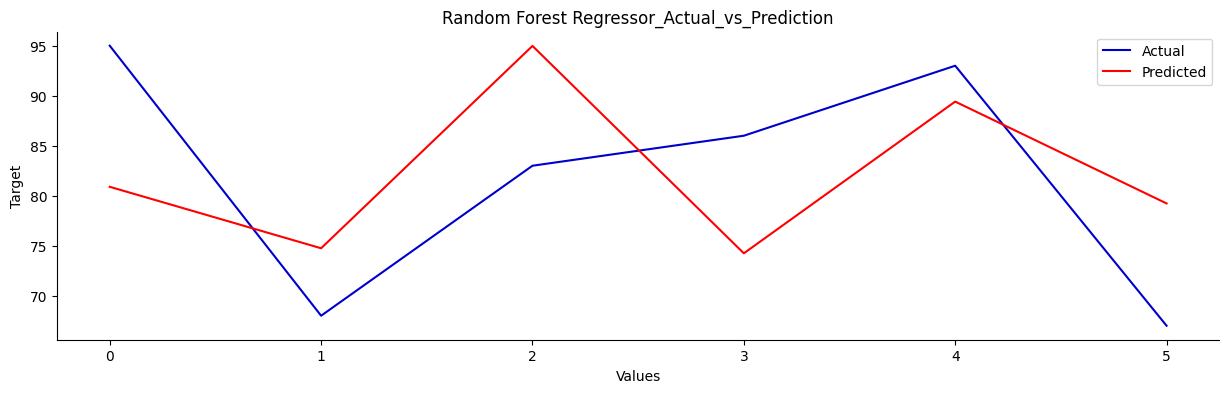

In [19]:
# Model
model = LinearRegression()
model.fit(X_train, Y_train)

# Evaluation
evaluation_fn(model, X_test, Y_test,'Random Forest Regressor')

Mean Absolute Error (MAE): 8.91
Mean Squared Error (MSE): 112.83
Root Mean Squared Error (RMSE): 10.62
R-squared (R²): 0.07


C:\Users\kulsr\anaconda3\envs\xgboost\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


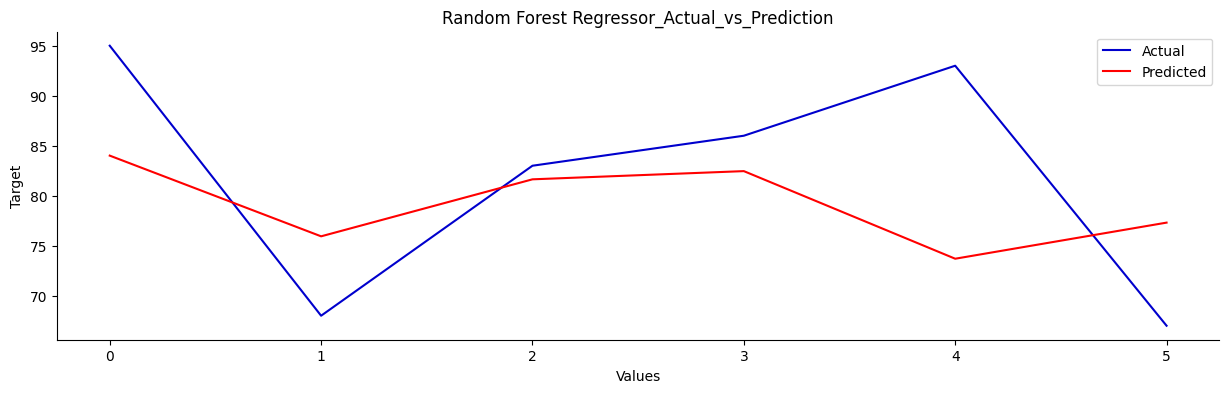

In [22]:
# Model
model = RandomForestRegressor(random_state=19)
model.fit(X_train, Y_train)

# Evaluation
evaluation_fn(model, X_test, Y_test,'Random Forest Regressor')

Mean Absolute Error (MAE): 9.24
Mean Squared Error (MSE): 125.49
Root Mean Squared Error (RMSE): 11.20
R-squared (R²): -0.03


C:\Users\kulsr\anaconda3\envs\xgboost\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


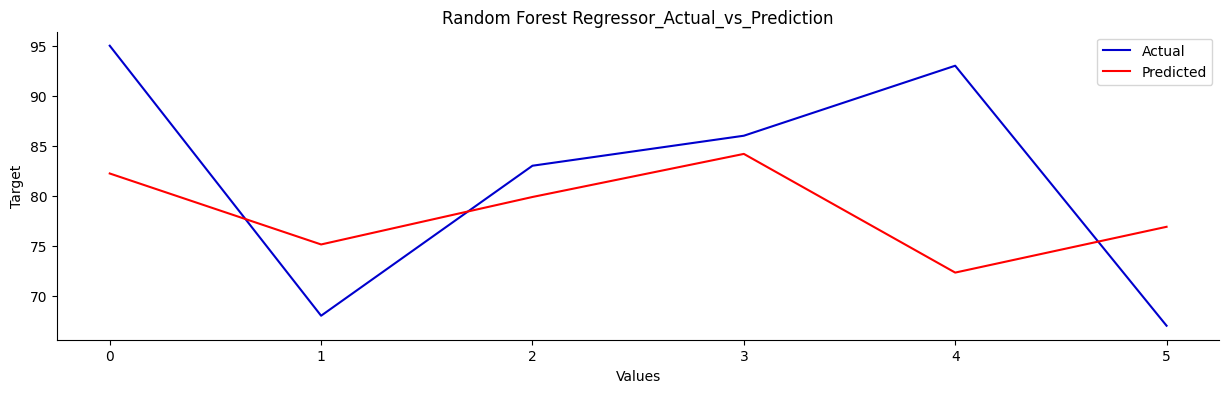

In [20]:
# Model
model = XGBRegressor(random_state=19)
model.fit(X_train, Y_train)

# Evaluation
evaluation_fn(model, X_test, Y_test,'Random Forest Regressor')

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [80,100,150,180, 200,],
    'max_depth': [6,8, 10, 12,14],
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=19)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, Y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model for evaluation


Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best Parameters: {'max_depth': 6, 'n_estimators': 180}


Mean Absolute Error (MAE): 8.59
Mean Squared Error (MSE): 107.90
Root Mean Squared Error (RMSE): 10.39
R-squared (R²): 0.11


C:\Users\kulsr\anaconda3\envs\xgboost\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


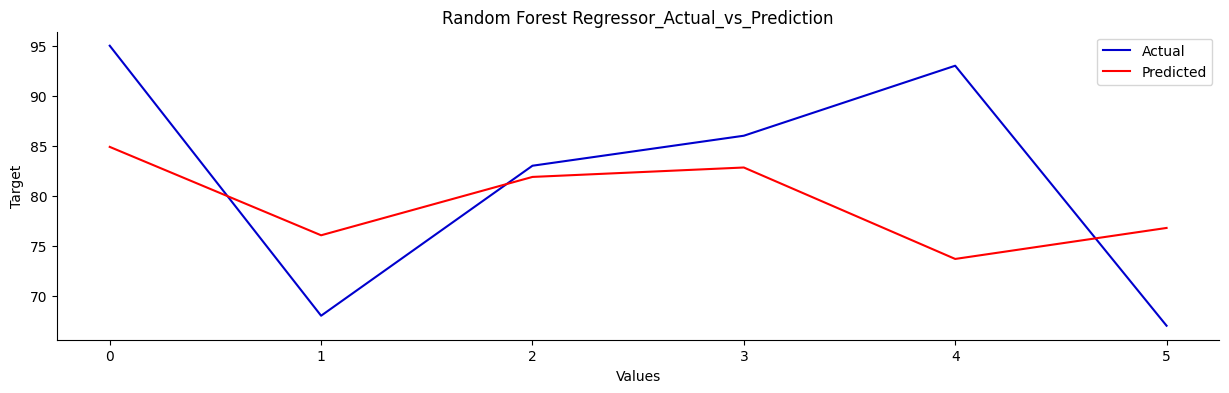

In [24]:
best_rf_model = grid_search.best_estimator_
evaluation_fn(best_rf_model, X_test, Y_test, 'Random Forest Regressor')


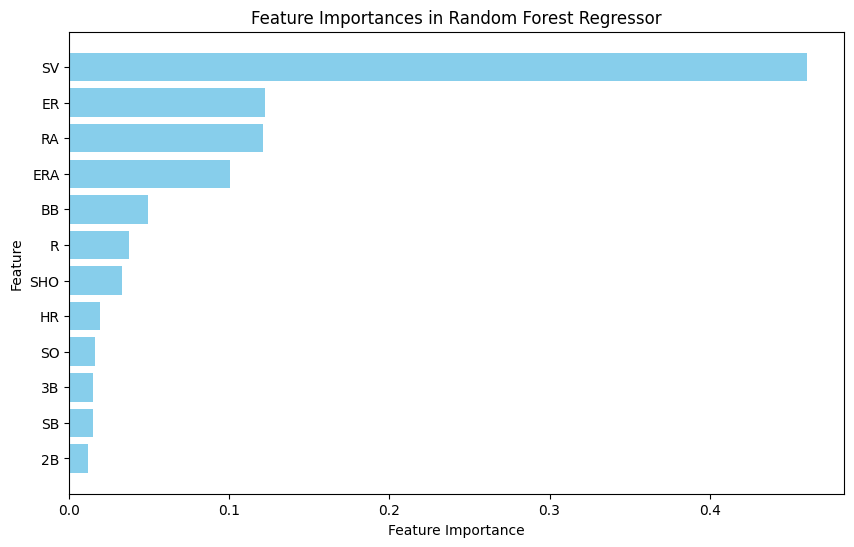

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming feature names are available in a list called feature_names
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

# Extract feature importances
importances = best_rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Regressor')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


In [53]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)
evaluation_fn(model,X_test,Y_test)

Accuracy of the model is: 0.8655764966740577
Precision of the model is: 0.8680686473560377
Recall of the model is: 0.8655764966740577
F1 score of the model is: 0.865053824978798


In [26]:
final_feature=['SHO','R','BB','ERA','RA','ER','SV']

In [27]:
X_train=X_train[final_feature]
X_test=X_test[final_feature]

Mean Absolute Error (MAE): 8.70
Mean Squared Error (MSE): 118.62
Root Mean Squared Error (RMSE): 10.89
R-squared (R²): 0.02


C:\Users\kulsr\anaconda3\envs\xgboost\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


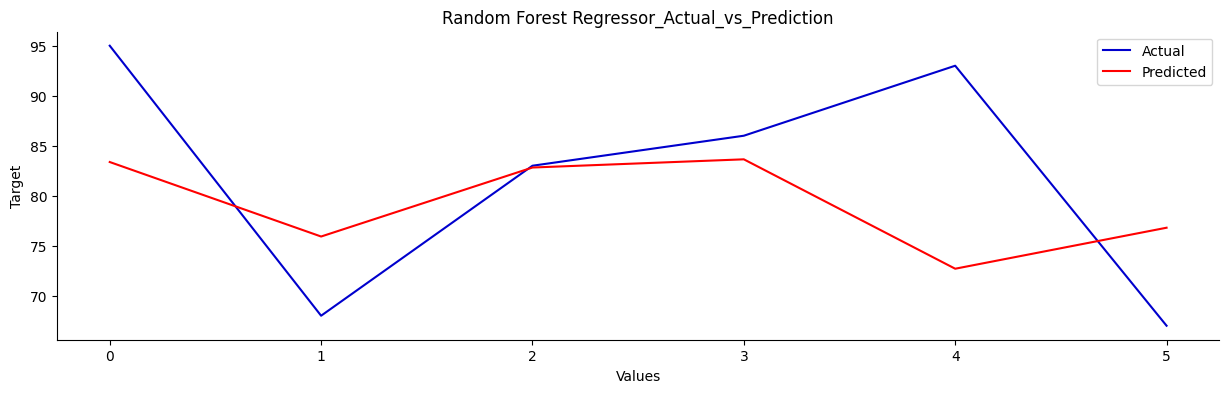

In [28]:
# Model
model = RandomForestRegressor(random_state=19)
model.fit(X_train, Y_train)

# Evaluation
evaluation_fn(model, X_test, Y_test,'Random Forest Regressor')